<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Ragnar Betancourt

**Fecha:** 23 de noviembre de 2021.

**Expediente** : if717467.
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 8

In [2]:
#importar las paqueterias
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
%matplotlib inline

#opciones para pandas
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

In [3]:
# función para descargar los precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    #  necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

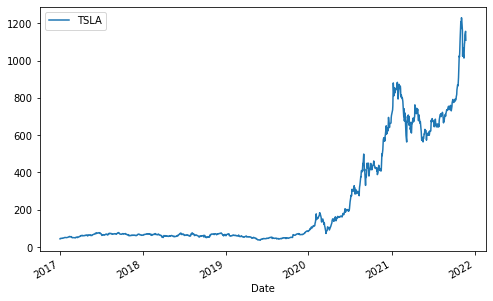

In [4]:
ticker = ['TSLA']
start_date = '2017-01-01'

closes_tsla = get_adj_closes(ticker, start_date)
closes_tsla.plot(figsize=(8,5));
plt.legend(ticker);

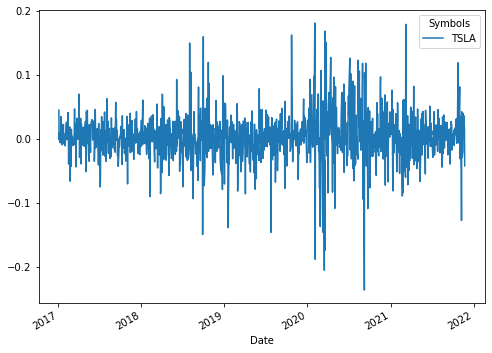

In [5]:
ret_tsla = calc_daily_ret(closes_tsla)
ret_tsla.plot(figsize =(8,6));

In [6]:
# obtenemos el rendimiento simple
Ri = closes_tsla.pct_change(1).iloc[1:]

# obtenemos su media y desviación estándar de los rendimientos
mu_R = Ri.mean()[0]
sigma_R = Ri.std()[0]
Ri

Symbols,TSLA
Date,
2017-01-04,0.046
2017-01-05,-0.001
2017-01-06,0.010
2017-01-09,0.010
2017-01-10,-0.006
...,...
2021-11-17,0.033
2021-11-18,0.007
2021-11-19,0.037


In [7]:
from datetime import date

today = pd.Timestamp(date.today())
expiry = '2022-05-20'

nscen = 10000
dates = pd.date_range(start = today, 
                      end = expiry, 
                      freq = 'B')
ndays = len(dates)
dates, ndays

(DatetimeIndex(['2021-11-23', '2021-11-24', '2021-11-25', '2021-11-26',
                '2021-11-29', '2021-11-30', '2021-12-01', '2021-12-02',
                '2021-12-03', '2021-12-06',
                ...
                '2022-05-09', '2022-05-10', '2022-05-11', '2022-05-12',
                '2022-05-13', '2022-05-16', '2022-05-17', '2022-05-18',
                '2022-05-19', '2022-05-20'],
               dtype='datetime64[ns]', length=129, freq='B'),
 129)

In [8]:
ri = calc_daily_ret(closes_tsla)

# media y DE de los rendimientos logarítmicos
mu_r = ri.mean()[0]
sigma_r = ri.std()[0]

# simulador del rendimiento 
dt = 1
Z = np.random.randn(ndays,nscen) 

sim_ret_ri = pd.DataFrame(mu_r*dt+Z*sigma_r*np.sqrt(dt), index=dates)

# simulacion normal de los rendimientos
Ri_dt = pd.DataFrame(mu_R * dt + Z * sigma_r * np.sqrt(dt),
                     index = dates)

# simulacion del precio
S_0 = closes_tsla.iloc[-1,0]
S_T = S_0*np.exp(sim_ret_ri.cumsum())

In [9]:
mu = ret_tsla.mean()[0]
sigma = ret_tsla.std()[0]
mu, sigma

(0.0026305419927991074, 0.0379263331559284)

In [13]:
# tasa de bonos de 1 año de fecha 11/23/21 -> 0.21%
r = 0.00021/360 # Tasa diaria

In [14]:
today = pd.to_datetime(date.today())
expiry = '2022-05-20'

dates = pd.date_range(start = today, 
                      end = expiry, 
                      freq = 'B')

ndays = len(dates)
nscen = 10
dates

DatetimeIndex(['2021-11-23', '2021-11-24', '2021-11-25', '2021-11-26',
               '2021-11-29', '2021-11-30', '2021-12-01', '2021-12-02',
               '2021-12-03', '2021-12-06',
               ...
               '2022-05-09', '2022-05-10', '2022-05-11', '2022-05-12',
               '2022-05-13', '2022-05-16', '2022-05-17', '2022-05-18',
               '2022-05-19', '2022-05-20'],
              dtype='datetime64[ns]', length=129, freq='B')

In [15]:
sim_ret = pd.DataFrame(sigma * np.random.randn(ndays,nscen) + r, 
                       index = dates)
sim_ret.cumsum()

,0,1,2,...,7,8,9
2021-11-23,-0.019,0.013,-0.005,...,0.018,-0.035,-0.014
2021-11-24,-0.034,0.050,0.002,...,0.074,-0.023,0.046
2021-11-25,0.023,-0.028,0.045,...,0.069,0.002,0.065
2021-11-26,-0.027,0.022,0.078,...,0.145,0.047,0.061
2021-11-29,-0.010,0.011,0.064,...,0.188,0.066,0.046
...,...,...,...,...,...,...,...
2022-05-16,0.693,-0.683,0.474,...,0.253,-0.071,0.647
2022-05-17,0.658,-0.681,0.483,...,0.241,-0.071,0.682
2022-05-18,0.613,-0.644,0.471,...,0.220,-0.023,0.708
2022-05-19,0.601,-0.569,0.537,...,0.230,-0.040,0.644


In [16]:
sim_ret = pd.DataFrame(sigma * np.random.randn(ndays,nscen) + r, 
                       index = dates)
sim_ret.cumsum()

,0,1,2,...,7,8,9
2021-11-23,0.005,-4.162e-04,0.014,...,0.009,0.109,-0.029
2021-11-24,0.010,2.519e-02,0.063,...,0.007,0.137,0.007
2021-11-25,0.013,2.796e-02,0.104,...,0.004,0.169,-0.002
2021-11-26,-0.005,3.579e-02,0.067,...,-0.020,0.157,0.108
2021-11-29,-0.008,8.495e-02,0.018,...,-0.111,0.191,0.165
...,...,...,...,...,...,...,...
2022-05-16,-0.261,8.413e-02,-0.020,...,-0.575,0.695,-0.233
2022-05-17,-0.255,9.656e-02,0.010,...,-0.566,0.733,-0.273
2022-05-18,-0.325,8.496e-02,-0.002,...,-0.571,0.739,-0.268
2022-05-19,-0.313,6.046e-02,-0.006,...,-0.608,0.728,-0.235


In [17]:
# condición inicial del precio a simular
S0 = closes_tsla.iloc[-1,0]  
sim_closes = S0*np.exp(sim_ret.cumsum())
sim_closes

,0,1,2,...,7,8,9
2021-11-23,1114.717,1108.569,1125.206,...,1119.098,1236.583,1077.561
2021-11-24,1120.385,1137.320,1181.355,...,1116.940,1271.339,1116.746
2021-11-25,1123.387,1140.471,1230.625,...,1113.166,1313.799,1106.455
2021-11-26,1103.163,1149.446,1186.377,...,1087.121,1297.441,1235.598
2021-11-29,1100.168,1207.362,1129.554,...,992.218,1342.280,1308.301
...,...,...,...,...,...,...,...
2022-05-16,854.457,1206.367,1087.103,...,623.868,2221.473,878.376
2022-05-17,859.692,1221.465,1120.512,...,629.960,2309.091,844.094
2022-05-18,801.249,1207.372,1106.819,...,626.352,2321.084,848.272
2022-05-19,810.783,1178.152,1102.158,...,604.049,2295.725,876.398


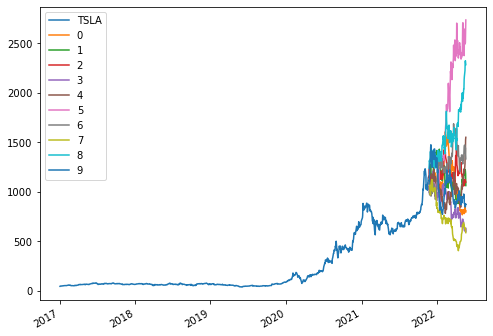

In [18]:
pd.concat([closes_tsla,sim_closes]).plot(figsize = (8,6));

In [20]:
from datetime import date
Hoy = date.today()
expiry = '2022-05-20'
# strike price
K = 1100 
nscen = 100000
dates = pd.date_range(start= Hoy, 
                      periods = ndays)
ndays = len(dates)
# condición inicial del precio a simular
S0 = closes_tsla.iloc[-1,0]  

# simular rendimientos
sim_ret = pd.DataFrame(sigma * np.random.randn(ndays,nscen) + r,
                       index = dates)

# simular los precios
sim_closes = S0*np.exp(sim_ret.cumsum())

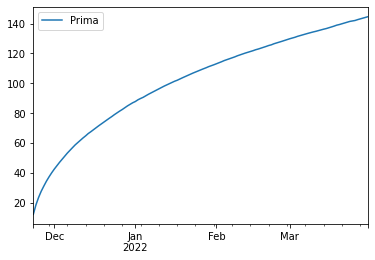

In [21]:
# valor del call 
strike = 1100
call = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(strike-sim_closes, 0).mean(axis=1)}, 
                    index = dates)
call.plot();

In [22]:
call.iloc[-1]

Prima    144.605
Name: 2022-03-31 00:00:00, dtype: float64

In [23]:
confianza = 0.95
sigma_est = sim_closes.iloc[-1].sem()
mean_est = call.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc = mean_est, scale = sigma_est)
i2 = st.norm.interval(confianza, loc = mean_est, scale=sigma_est)
print(i1)
print(i2)

(141.18037973933403, 148.0303087146203)
(141.18042119430137, 148.03026725965296)


In [25]:
vol = ret_tsla['TSLA'].std()*np.sqrt(252)
media = ret_tsla['TSLA'].mean()*252
maduracion = ndays
st = closes_tsla.iloc[-1,0]
rf = r*360

In [27]:
#Black Scholes
from scipy.stats import norm
d1 = (np.log(st/K)+(rf+(vol**2)/2))/vol
d2 = d1-vol
put = K*np.exp(-rf)*norm.cdf(-d2)-st*norm.cdf(-d1)
print(' Black Scholes :',put)
print(' opción simulacion:',call.iloc[-1].values)

 Black Scholes : 256.7050607310636
 opción simulacion: [144.60534423]
